### Goal
Predict if a passenger survived the sinking of the Titanic or not. 

### Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Read and describe the training data

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
round(raw_data.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### Probability of survival for class and sex

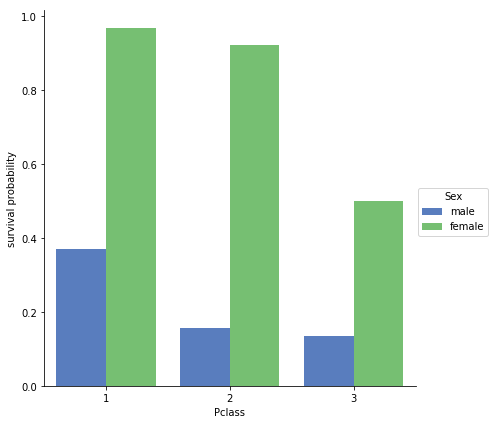

In [4]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=raw_data, size=6, kind='bar', palette='muted', ci=None)

g.set_ylabels('survival probability')

#### Survival percentage per group

In [5]:
max_child_age = 12
total = float(len(raw_data))

survived = raw_data[raw_data['Survived'] == True]
female = raw_data[raw_data['Sex'] == 'female']
male = raw_data[raw_data['Sex'] == 'male']
male_child = raw_data[(raw_data['Sex'] == 'male') & (raw_data['Age'] <= max_child_age)]
male_adult = raw_data[(raw_data['Sex'] == 'male') & (raw_data['Age'] > max_child_age)]
select_woman_or_child = (raw_data['Sex'] == 'female') | (raw_data['Age'] <= max_child_age)
woman_or_child = raw_data[select_woman_or_child]
not_woman_or_child = raw_data[~select_woman_or_child]

print('From %d passengers %d%% (%d) survived.' % (total, raw_data.Survived.mean() * 100, len(survived)))
print('Female: %d%% (%d)' % (female.Survived.mean() * 100, len(female)))
print('Male: %d%% (%d)' % (male.Survived.mean() * 100, len(male)))
print('Male and child: %d%% (%d)' % (male_child.Survived.mean() * 100, len(male_child)))
print('Female or child: %d%% (%d)' % (woman_or_child.Survived.mean() * 100, len(woman_or_child)))
print('Not (Female or child): %d%% (%d)' % (not_woman_or_child.Survived.mean() * 100, len(not_woman_or_child)))

From 891 passengers 38% (342) survived.
Female: 74% (314)
Male: 18% (577)
Male and child: 56% (37)
Female or child: 72% (351)
Not (Female or child): 16% (540)


#### Prediction and accuracy

In [6]:
no_one_survived = total - len(survived)
woman_survived = len(female[female.Survived == True]) + len(male[male.Survived == False])
woman_or_child_survived = len(woman_or_child[woman_or_child.Survived == True]) + \
                          len(not_woman_or_child[not_woman_or_child.Survived == False])

print('No one will survive: %.2f' % (no_one_survived * 100 / total))
print('Woman will survive: %.2f' % (woman_survived * 100 / total))
print('Woman and children will survive: %.2f' % (woman_or_child_survived * 100 / total))

No one will survive: 61.62
Woman will survive: 78.68
Woman and children will survive: 79.24


### Baseline prediction with ~ 79.24% accuracy:  All woman and children will survive!

### Prepare the data
#### One-hot encoding

In [7]:
data = raw_data.copy()

embarked = pd.get_dummies(raw_data.Embarked, prefix='Embarked')
data = pd.concat([data, embarked], axis=1)
data = data.drop(columns=['Embarked'])

data['Sex'] = data['Sex'] == 'male'
data.rename(columns={'Sex': 'Is_male'}, inplace=True)

data.head(3)

,PassengerId,Survived,Pclass,Name,Is_male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1


#### English honorifics in Name

In [8]:
print('Total passengers:', len(raw_data))
print('Mr.', len(raw_data[raw_data.Name.str.contains('Mr\.')]))
print('Miss.', len(raw_data[raw_data.Name.str.contains('Miss\.')]))
print('Mrs.', len(raw_data[raw_data.Name.str.contains('Mrs\.')]))
print('Master.', len(raw_data[raw_data.Name.str.contains('Master\.')]))
print('Dr', len(raw_data[raw_data.Name.str.contains('Dr')]))
print('Sir', len(raw_data[raw_data.Name.str.contains('Sir')]))
print('Ms', len(raw_data[raw_data.Name.str.contains('Ms')]))
print('Lady', len(raw_data[raw_data.Name.str.contains('Lady')]))
print('Lord', len(raw_data[raw_data.Name.str.contains('Lord')]))
print('General', len(raw_data[raw_data.Name.str.contains('General')]))
print('Captain', len(raw_data[raw_data.Name.str.contains('Captain')]))

Total passengers: 891
Mr. 517
Miss. 182
Mrs. 125
Master. 40
Dr 11
Sir 3
Ms 1
Lady 1
Lord 0
General 0
Captain 0


In [9]:
data['Mr'] = data.Name.str.contains('Mr\.')
data['Miss'] = data.Name.str.contains('Miss\.')
data['Mrs'] = data.Name.str.contains('Mrs\.')
data['Master'] = data.Name.str.contains('Master\.')

data[['Name', 'Mr', 'Miss', 'Mrs', 'Master']].head(8)

,Name,Mr,Miss,Mrs,Master
0,"Braund, Mr. Owen Harris",True,False,False,False
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,False,True,False
2,"Heikkinen, Miss. Laina",False,True,False,False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,False,True,False
4,"Allen, Mr. William Henry",True,False,False,False
5,"Moran, Mr. James",True,False,False,False
6,"McCarthy, Mr. Timothy J",True,False,False,False
7,"Palsson, Master. Gosta Leonard",False,False,False,True


In [10]:
data['Age_is_null'] = data.Age.isnull()
print(len(data[data.Age_is_null == True]), 'passengers are without age.')

177 passengers are without age.


In [11]:
data['Deck_a'] = raw_data.Cabin.str.contains('A', na=False)
data['Deck_b'] = raw_data.Cabin.str.contains('B', na=False)
data['Deck_c'] = raw_data.Cabin.str.contains('C', na=False)
data['Deck_d'] = raw_data.Cabin.str.contains('D', na=False)
data['Deck_e'] = raw_data.Cabin.str.contains('E', na=False)
data['Deck_f'] = raw_data.Cabin.str.contains('F', na=False)
data['Deck_g'] = raw_data.Cabin.str.contains('G', na=False)

### Log transform Fare
Make the skewed distribution as normal-like as possible. 

In [12]:
data['Fare_log'] = np.log((1 + data['Fare']))
data['Fare_log_round'] = round(data.Fare_log).astype(int)
data[['Fare', 'Fare_log', 'Fare_log_round']].describe()

,Fare,Fare_log,Fare_log_round
count,891.000000,891.000000,891.000000
mean,32.204208,2.962246,2.874299
std,49.693429,0.969048,1.021082
min,0.000000,0.000000,0.000000
25%,7.910400,2.187218,2.000000
50%,14.454200,2.737881,3.000000
75%,31.000000,3.465736,3.000000
max,512.329200,6.240917,6.000000


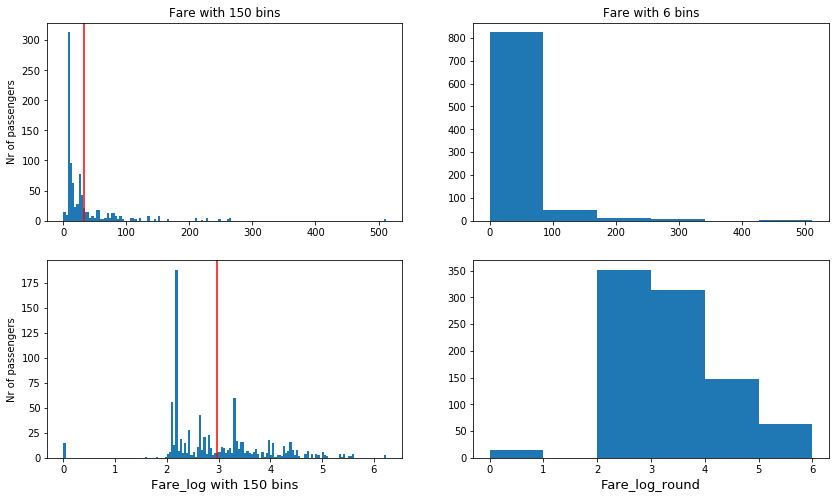

Red line is mean


In [13]:
plt.figure(1, figsize=(14, 8))

plt.subplot(221)
n, bins, patches = plt.hist(data.Fare, 150)
plt.axvline(data.Fare.mean(), color='r')
plt.ylabel('Nr of passengers')
plt.title('Fare with 150 bins')

plt.subplot(222)
n, bins, patches = plt.hist(data.Fare, 6)
plt.title('Fare with 6 bins')

plt.subplot(223)
n, bins, patches = plt.hist(data.Fare_log, 150)
plt.axvline(data.Fare_log.mean(), color='r')
plt.xlabel('Fare_log with 150 bins', size=13)
plt.ylabel('Nr of passengers')

plt.subplot(224)
n, bins, patches = plt.hist(data.Fare_log_round, len(data.Fare_log_round.unique()))
plt.xlabel('Fare_log_round', size=13)
plt.show()
print('Red line is mean')

#### Split data into features and labels

In [14]:
from sklearn.preprocessing import Imputer

# Convert to numpy array
y = np.array(data.Survived)

X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head(6)

,Pclass,Is_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Mr,...,Age_is_null,Deck_a,Deck_b,Deck_c,Deck_d,Deck_e,Deck_f,Deck_g,Fare_log,Fare_log_round
0,3,True,22.0,1,0,7.2500,0,0,1,True,...,False,False,False,False,False,False,False,False,2.110213,2
1,1,False,38.0,1,0,71.2833,1,0,0,False,...,False,False,False,True,False,False,False,False,4.280593,4
2,3,False,26.0,0,0,7.9250,0,0,1,False,...,False,False,False,False,False,False,False,False,2.188856,2
3,1,False,35.0,1,0,53.1000,0,0,1,False,...,False,False,False,True,False,False,False,False,3.990834,4
4,3,True,35.0,0,0,8.0500,0,0,1,True,...,False,False,False,False,False,False,False,False,2.202765,2
5,3,True,NaN,0,0,8.4583,0,1,0,True,...,True,False,False,False,False,False,False,False,2.246893,2


In [15]:
X_columns = list(X.columns)
X = np.array(X)

# Create our imputer to replace missing values with the mean e.g.
imp = Imputer(missing_values='NaN', strategy='mean')
imp = imp.fit(X)

# Impute our data
X = imp.transform(X)

my_random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=my_random_state)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape ', X_test.shape)
print('y_test shape ', y_test.shape)

X_train shape (668, 23)
y_train shape (668,)
X_test shape  (223, 23)
y_test shape  (223,)


### Train Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=my_random_state)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict

In [17]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

print('Accuracy: %.2f' % (100 - sum(errors) * 100 / len(errors)))

Accuracy: 82.51


#### Feature importances

In [18]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# Print out the feature and importance's 
feature_importances

[('Age', 0.16),
 ('Fare', 0.13),
 ('Fare_log', 0.13),
 ('Mr', 0.12),
 ('Is_male', 0.11),
 ('Pclass', 0.06),
 ('SibSp', 0.05),
 ('Mrs', 0.04),
 ('Parch', 0.03),
 ('Miss', 0.03),
 ('Fare_log_round', 0.03),
 ('Age_is_null', 0.02),
 ('Embarked_C', 0.01),
 ('Embarked_Q', 0.01),
 ('Embarked_S', 0.01),
 ('Master', 0.01),
 ('Deck_b', 0.01),
 ('Deck_c', 0.01),
 ('Deck_d', 0.01),
 ('Deck_e', 0.01),
 ('Deck_a', 0.0),
 ('Deck_f', 0.0),
 ('Deck_g', 0.0)]

#### Visualizing a Single Decision Tree

In [ ]:
# To install missing packages, run in terminal:
# conda install graphviz pydot
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[1]

# Export the image to a dot file
export_graphviz(tree, out_file='tree.dot', feature_names=X_columns, rounded=True, precision=1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

# Display the image
from IPython.display import Image
Image("tree.png")

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

#### Use the random grid to search for best hyperparameters

In [ ]:
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 40 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 40, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

In [ ]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    print('Accuracy: %.2f' % (100 - sum(errors) * 100 / len(errors)))

Base model Performance

In [ ]:
base_model = RandomForestClassifier(n_estimators=1000, random_state=my_random_state)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

RandomizedSearchCV model Performance

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 95, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 200]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

GridSearchCV model Performance

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)